importing library

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Loading dataset and get  insight of data

In [10]:
df = sns.load_dataset('mpg').dropna()

X = df.drop(columns=['mpg'])
y = df['mpg']

In [15]:
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa,name_amc ambassador dpl,name_amc ambassador sst,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,8,307.0,130.0,3504,12.0,70,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8,350.0,165.0,3693,11.5,70,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8,318.0,150.0,3436,11.0,70,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8,304.0,150.0,3433,12.0,70,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8,302.0,140.0,3449,10.5,70,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
394,4,97.0,52.0,2130,24.6,82,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
395,4,135.0,84.0,2295,11.6,82,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
396,4,120.0,79.0,2625,18.6,82,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [11]:
X = pd.get_dummies(X, drop_first=True)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Model 

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

model = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')

RMSE: 2.967
R²: 0.834


Calculating Feature Importance for better accuracy

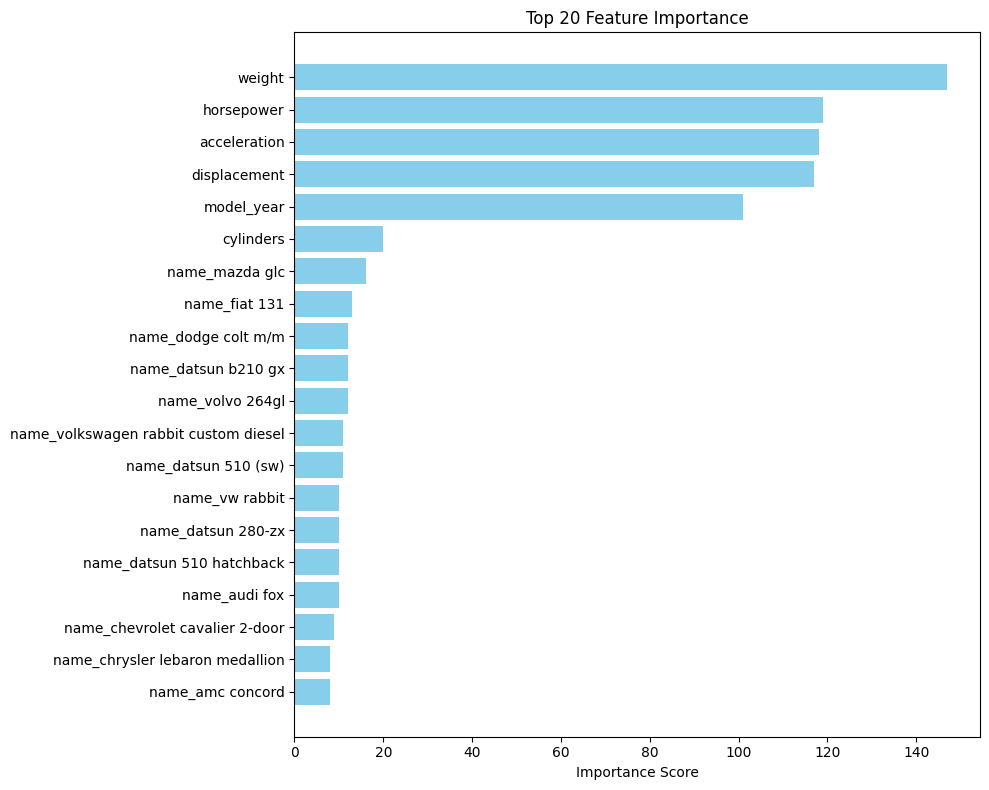

In [14]:
importance = model.get_booster().get_score(importance_type='weight')

importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

top_n = 20
plt.figure(figsize=(10, 8))
plt.barh(
    importance_df['Feature'].head(top_n)[::-1],
    importance_df['Importance'].head(top_n)[::-1],
    color='skyblue'
)
plt.xlabel('Importance Score')
plt.title(f'Top {top_n} Feature Importance')
plt.tight_layout()
plt.show()